# Load Data and Explore

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import yfinance as yf
from sklearn.linear_model import LinearRegression
from datetime import timedelta

In [2]:
portfolio_df = pd.read_excel('../data/TCI.xlsx', sheet_name='Sheet1')

In [3]:
portfolio_df.head()

,Year,Quarter End,Security Type,Mkt value,Qty,ISIN,SEDOL,Coupon,Maturity,Instrument Description,Issuer,Sector,% of NAV
0,2018,1,Equity,2.269794e+09,61864102,US90130A1016,BBM4S68,NaN,NaN,TWENTY FIRST CENTURY FOX CL A ORD (NMS),21st Century Fox,NaN,0.128385
1,2018,1,Equity,3.703355e+08,10182445,US90130A2006,BBM4S80,NaN,NaN,TWENTY FIRST CENTURY FOX CL B ORD (NMS),21st Century Fox,NaN,0.020947
2,2018,1,Equity,1.330941e+09,6600000,ES0105046009,BVRZ8L1,NaN,NaN,AENA ORD (MCE) CFD,Aena,NaN,0.075281
3,2018,1,Equity,1.681670e+09,14549199,NL0000235190,4012250,NaN,NaN,AIRBUS ORD (PAR),Airbus,NaN,0.095119
4,2018,1,Equity,-4.483429e+09,-24427531,US01609W1027,BP41ZD1,NaN,NaN,ALIBABA GROUP HOLDING ADR REP 1 ORD (NYS),Alibaba,NaN,-0.253593


In [4]:
print(portfolio_df.shape)

(1271, 13)


In [5]:
portfolio_df['Year Quarter Formatted'] = portfolio_df['Year'].astype(str) + '-Q' + portfolio_df['Quarter End'].astype(str)
portfolio_df['Year Quarter Date'] = pd.to_datetime(portfolio_df['Year Quarter Formatted']) + pd.offsets.QuarterEnd(0)

/tmp/ipykernel_1756534/4149915252.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  portfolio_df['Year Quarter Date'] = pd.to_datetime(portfolio_df['Year Quarter Formatted']) + pd.offsets.QuarterEnd(0)


In [6]:
portfolio_df.iloc[123:126]

,Year,Quarter End,Security Type,Mkt value,Qty,ISIN,SEDOL,Coupon,Maturity,Instrument Description,Issuer,Sector,% of NAV,Year Quarter Formatted,Year Quarter Date
123,2018,3,Equity Swap,-3.318661e+08,-1885440,DE0007664039,5497168,NaN,NaN,VOLKSWAGEN PR (GER) CFD,Volkswagen (short),NaN,-0.016244,2018-Q3,2018-09-30
124,2018,3,Equity Swap,-5.704467e+08,-28096331,AU000000WOW2,6981239,NaN,NaN,WOOLWORTHS ORD (ASX) CFD,Woolworths,NaN,-0.027922,2018-Q3,2018-09-30
125,2018,4,Equity,4.916598e+09,102173681,US90130A3095,BJ0M5P8,NaN,NaN,TWENTY FIRST CENTURY FOX CL A ORD (NMS) (DEAD ...,21st Century Fox,NaN,0.264040,2018-Q4,2018-12-31


In [7]:
security_type_count = portfolio_df.groupby('Security Type')['ISIN'].nunique()
print(security_type_count)

Security Type
Equity           78
Equity Option     2
Equity Swap      31
Name: ISIN, dtype: int64


In [8]:
portfolio_equity_df = portfolio_df[portfolio_df['Security Type']=='Equity']
portfolio_equity_df.head()

,Year,Quarter End,Security Type,Mkt value,Qty,ISIN,SEDOL,Coupon,Maturity,Instrument Description,Issuer,Sector,% of NAV,Year Quarter Formatted,Year Quarter Date
0,2018,1,Equity,2.269794e+09,61864102,US90130A1016,BBM4S68,NaN,NaN,TWENTY FIRST CENTURY FOX CL A ORD (NMS),21st Century Fox,NaN,0.128385,2018-Q1,2018-03-31
1,2018,1,Equity,3.703355e+08,10182445,US90130A2006,BBM4S80,NaN,NaN,TWENTY FIRST CENTURY FOX CL B ORD (NMS),21st Century Fox,NaN,0.020947,2018-Q1,2018-03-31
2,2018,1,Equity,1.330941e+09,6600000,ES0105046009,BVRZ8L1,NaN,NaN,AENA ORD (MCE) CFD,Aena,NaN,0.075281,2018-Q1,2018-03-31
3,2018,1,Equity,1.681670e+09,14549199,NL0000235190,4012250,NaN,NaN,AIRBUS ORD (PAR),Airbus,NaN,0.095119,2018-Q1,2018-03-31
4,2018,1,Equity,-4.483429e+09,-24427531,US01609W1027,BP41ZD1,NaN,NaN,ALIBABA GROUP HOLDING ADR REP 1 ORD (NYS),Alibaba,NaN,-0.253593,2018-Q1,2018-03-31


In [9]:
print(portfolio_equity_df.shape)

(835, 15)


In [10]:
portfolio_swap_df = portfolio_df[portfolio_df['Security Type']=='Equity Swap']
portfolio_swap_df.head()

,Year,Quarter End,Security Type,Mkt value,Qty,ISIN,SEDOL,Coupon,Maturity,Instrument Description,Issuer,Sector,% of NAV,Year Quarter Formatted,Year Quarter Date
33,2018,1,Equity Swap,1.091186e+09,5411079,ES0105046009,BVRZ8L1,NaN,NaN,AENA ORD (MCE) CFD,Aena,NaN,0.061720,2018-Q1,2018-03-31
34,2018,1,Equity Swap,1.262365e+09,40733147,IT0003506190,7667163,NaN,NaN,ATLANTIA ORD (MIL) CFD,Atlantia,NaN,0.071402,2018-Q1,2018-03-31
35,2018,1,Equity Swap,1.632502e+09,502453067,AU000000AZJ1,B87CVM3,NaN,NaN,AURIZON ORD (ASX) CFD,Aurizon,NaN,0.092338,2018-Q1,2018-03-31
36,2018,1,Equity Swap,2.395772e+08,50115599,BRCESPACNPB4,B17MHG0,NaN,NaN,CIA ENERGETICA DE SAO PAULO B PRF (SAO) CFD,CESP,NaN,0.013551,2018-Q1,2018-03-31
37,2018,1,Equity Swap,3.062096e+07,2142210,FR0010533075,B292JQ9,NaN,NaN,GETLINK ORD (PAR) CFD,Eurotunnel,NaN,0.001732,2018-Q1,2018-03-31


In [11]:
print(portfolio_swap_df.shape)

(434, 15)


# Portfolio Summary

In [12]:
def create_stacked_bar_chart(df: pd.DataFrame, stacked_column: str):
    """
    Generates a stacked bar chart showing the stacked_column for each ISIN per quarter.

    Args:
        df: A pandas DataFrame with the specified columns.
        stacked_column: variable header whose value to be stacked
    """
    # --- 1. Data Cleaning and Preparation ---
    # Ensure the specified column is a numeric type
    df[stacked_column] = pd.to_numeric(df[stacked_column], errors='coerce')

    # Drop any rows where the stacked_column value is missing or could not be converted
    df.dropna(subset=[stacked_column], inplace=True)
    print(df.shape)

    # --- 2. Create the stacked bar chart using Plotly Express ---
    # The x-axis is the 'Year Quarter Formatted' column
    # The y-axis is the value from the 'stacked_column'
    # The 'color' parameter stacks the bars by 'ISIN'

    fig = px.bar(
        df,
        x='Year Quarter Formatted',
        y=stacked_column,
        color='ISIN',
        title=f'Holding Weight ({stacked_column}) of Each ISIN per Quarter',
        labels={
            stacked_column: f'Value of {stacked_column}',
            'Year Quarter Formatted': 'Quarter'
        },
        hover_data={'ISIN': True, stacked_column: ':,.2f'} # Format hover tooltip
    )

    # Customize the layout for better readability
    fig.update_layout(
        xaxis_title='Quarter',
        yaxis_title=f'Stack of ({stacked_column})',
        legend_title='ISIN',
        barmode='relative', # This ensures the bars are stacked
        yaxis=dict(
            autorange=True
        ),
        uniformtext_minsize=8, # Ensure labels are readable
        uniformtext_mode='hide', # Hide text if it doesn't fit
    )

    fig.show()


### Market Value

In [13]:
portfolio_pivot_mkt_value = pd.pivot_table(
    portfolio_df,
    values='Mkt value',
    index=['ISIN', 'Issuer'],
    columns='Year Quarter Formatted',
    aggfunc='sum'
)

In [14]:
portfolio_pivot_mkt_value.head()

Year Quarter Formatted            2018-Q1       2018-Q2       2018-Q3  \
ISIN         Issuer                                                     
AU000000AZJ1 Aurizon         1.632502e+09  1.420560e+09  5.336968e+08   
AU000000IFN8 Infigen                  NaN           NaN           NaN   
             Infigen Energy  6.281136e+07  6.831314e+07  5.963276e+07   
AU000000WOW2 Woolworths     -6.329407e+08 -7.083289e+08 -5.704467e+08   
BMG475671050 IHS Markit Ltd           NaN           NaN           NaN   

Year Quarter Formatted            2018-Q4       2019-Q1       2019-Q2  \
ISIN         Issuer                                                     
AU000000AZJ1 Aurizon                  NaN           NaN           NaN   
AU000000IFN8 Infigen                  NaN           NaN  4.660510e+07   
             Infigen Energy  4.583519e+07  4.364771e+07           NaN   
AU000000WOW2 Woolworths     -3.741958e+08 -2.127914e+08 -2.100291e+08   
BMG475671050 IHS Markit Ltd           NaN           NaN           NaN   

Year Quarter Formatted            2019-Q3       2019-Q4       2020-Q1  \
ISIN         Issuer                                                     
AU000000AZJ1 Aurizon                  NaN           NaN           NaN   
AU000000IFN8 Infigen         6.516443e+07  6.477188e+07  3.785504e+07   
             Infigen Energy           NaN           NaN           NaN   
AU000000WOW2 Woolworths     -2.265967e+08 -2.285481e+08 -1.939870e+08   
BMG475671050 IHS Markit Ltd           NaN           NaN           NaN   

Year Quarter Formatted            2020-Q2  ...  2022-Q4  2023-Q1  2023-Q2  \
ISIN         Issuer                        ...                              
AU000000AZJ1 Aurizon                  NaN  ...      NaN      NaN      NaN   
AU000000IFN8 Infigen         9.415558e+07  ...      NaN      NaN      NaN   
             Infigen Energy           NaN  ...      NaN      NaN      NaN   
AU000000WOW2 Woolworths     -8.760004e+07  ...      NaN      NaN      NaN   
BMG475671050 IHS Markit Ltd           NaN  ...      NaN      NaN      NaN   

Year Quarter Formatted       2023-Q3  2023-Q4  2024-Q1  2024-Q2  2024-Q3  \
ISIN         Issuer                                                        
AU000000AZJ1 Aurizon             NaN      NaN      NaN      NaN      NaN   
AU000000IFN8 Infigen             NaN      NaN      NaN      NaN      NaN   
             Infigen Energy      NaN      NaN      NaN      NaN      NaN   
AU000000WOW2 Woolworths          NaN      NaN      NaN      NaN      NaN   
BMG475671050 IHS Markit Ltd      NaN      NaN      NaN      NaN      NaN   

Year Quarter Formatted       2024-Q4  2025-Q1  
ISIN         Issuer                            
AU000000AZJ1 Aurizon             NaN      NaN  
AU000000IFN8 Infigen             NaN      NaN  
             Infigen Energy      NaN      NaN  
AU000000WOW2 Woolworths          NaN      NaN  
BMG475671050 IHS Markit Ltd      NaN      NaN  

[5 rows x 29 columns]

(1271, 15)


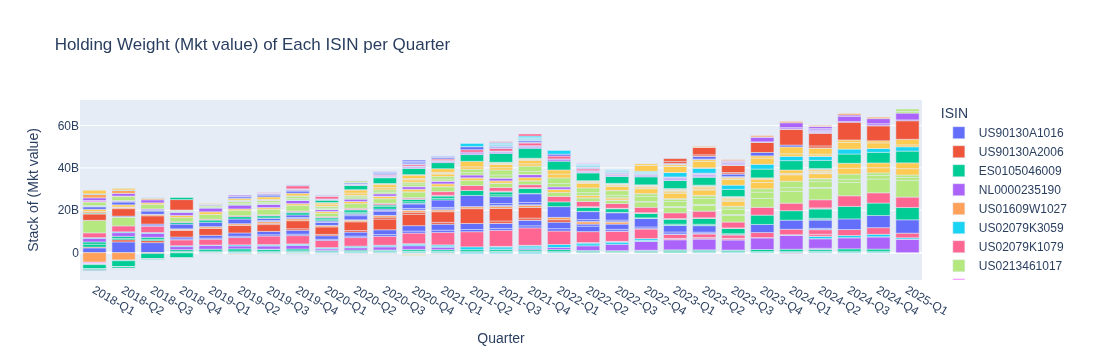

In [15]:
create_stacked_bar_chart(portfolio_df, 'Mkt value')

/tmp/ipykernel_1756534/268684874.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1756534/268684874.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(835, 15)


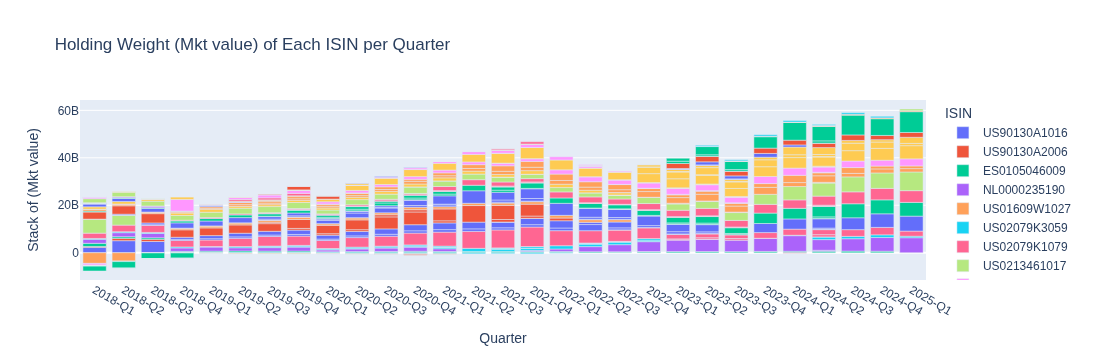

In [16]:
create_stacked_bar_chart(portfolio_equity_df, 'Mkt value')

### % of NAV

In [17]:
portfolio_pivot_nav = pd.pivot_table(
    portfolio_df,
    values='% of NAV',
    index=['ISIN', 'Issuer'],
    columns='Year Quarter Formatted',
    aggfunc='sum'
)

In [18]:
portfolio_pivot_nav.head()

Year Quarter Formatted        2018-Q1   2018-Q2   2018-Q3   2018-Q4   2019-Q1  \
ISIN         Issuer                                                             
AU000000AZJ1 Aurizon         0.092338  0.071610  0.026123       NaN       NaN   
AU000000IFN8 Infigen              NaN       NaN       NaN       NaN       NaN   
             Infigen Energy  0.003553  0.003444  0.002919  0.002462  0.001909   
AU000000WOW2 Woolworths     -0.035801 -0.035706 -0.027922 -0.020096 -0.009304   
BMG475671050 IHS Markit Ltd       NaN       NaN       NaN       NaN       NaN   

Year Quarter Formatted        2019-Q2   2019-Q3   2019-Q4   2020-Q1   2020-Q2  \
ISIN         Issuer                                                             
AU000000AZJ1 Aurizon              NaN       NaN       NaN       NaN       NaN   
AU000000IFN8 Infigen         0.001884  0.002540  0.002287  0.001785  0.003358   
             Infigen Energy       NaN       NaN       NaN       NaN       NaN   
AU000000WOW2 Woolworths     -0.008490 -0.008831 -0.008069 -0.009148 -0.003124   
BMG475671050 IHS Markit Ltd       NaN       NaN       NaN       NaN       NaN   

Year Quarter Formatted       ...  2022-Q4  2023-Q1  2023-Q2  2023-Q3  2023-Q4  \
ISIN         Issuer          ...                                                
AU000000AZJ1 Aurizon         ...      NaN      NaN      NaN      NaN      NaN   
AU000000IFN8 Infigen         ...      NaN      NaN      NaN      NaN      NaN   
             Infigen Energy  ...      NaN      NaN      NaN      NaN      NaN   
AU000000WOW2 Woolworths      ...      NaN      NaN      NaN      NaN      NaN   
BMG475671050 IHS Markit Ltd  ...      NaN      NaN      NaN      NaN      NaN   

Year Quarter Formatted       2024-Q1  2024-Q2  2024-Q3  2024-Q4  2025-Q1  
ISIN         Issuer                                                       
AU000000AZJ1 Aurizon             NaN      NaN      NaN      NaN      NaN  
AU000000IFN8 Infigen             NaN      NaN      NaN      NaN      NaN  
             Infigen Energy      NaN      NaN      NaN      NaN      NaN  
AU000000WOW2 Woolworths          NaN      NaN      NaN      NaN      NaN  
BMG475671050 IHS Markit Ltd      NaN      NaN      NaN      NaN      NaN  

[5 rows x 29 columns]

(1271, 15)


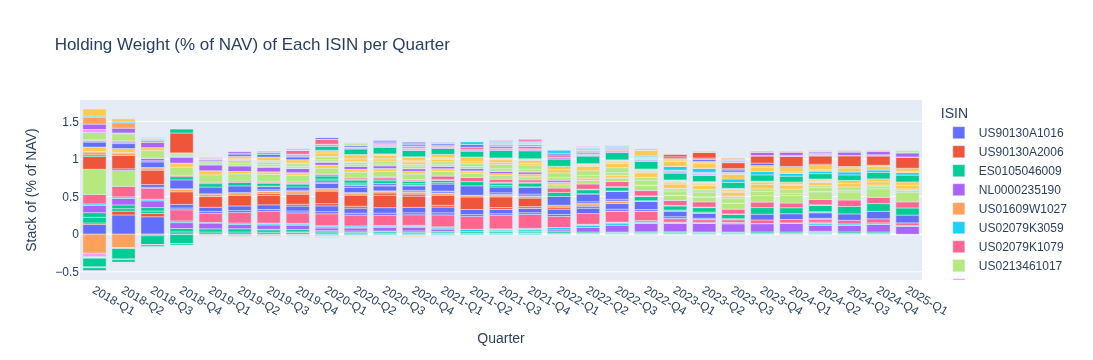

In [19]:
create_stacked_bar_chart(portfolio_df, '% of NAV')

# Return Measures

### Simple Return

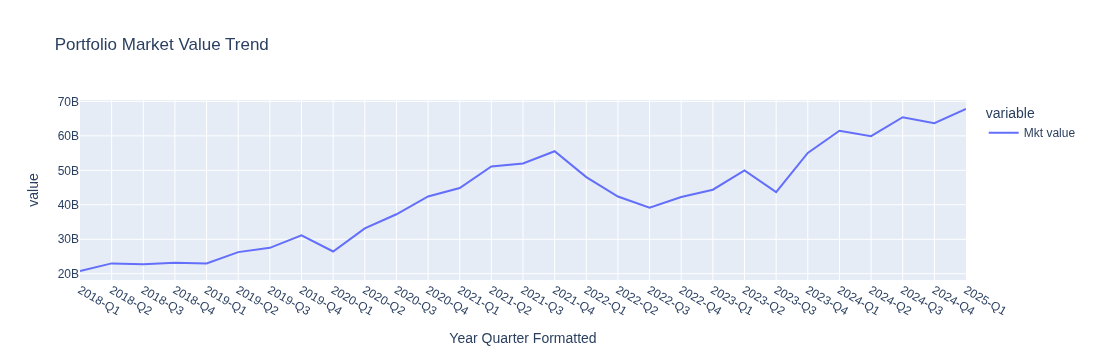

In [23]:
portfolio_value_df = portfolio_df.groupby('Year Quarter Formatted')['Mkt value'].sum().to_frame()
px.line(portfolio_value_df, title ='Portfolio Market Value Trend')


In [49]:
portfolio_value_df['Portfolio Simple Returns'] = portfolio_value_df['Mkt value'].pct_change()
portfolio_value_df = portfolio_value_df.dropna()


In [50]:
annualized_portfolio_return = ((1+ portfolio_value_df['Portfolio Simple Returns'].mean()) ** 4) - 1
annualized_portfolio_return

np.float64(0.20858115538019795)

# Risk Measures

### Valatility

In [51]:
quarterly_volatility = np.std(portfolio_value_df['Portfolio Simple Returns'])
annual_volatility = quarterly_volatility*np.sqrt(4)
annual_volatility

np.float64(0.20988822050914954)

### Maximum Drawdown

In [52]:
cumulative_simple_returns = ((1 + portfolio_value_df['Portfolio Simple Returns']).cumprod())
max_drawdown = ((cumulative_simple_returns.cummax() - cumulative_simple_returns)/cumulative_simple_returns.cummax()).max()
max_drawdown

np.float64(0.29479840449741895)

# Market Sensitivity

### Beta

In [54]:
benchmark_daily = yf.download('^GSPC', start = portfolio_df['Year Quarter Date'].iloc[0] - timedelta(days=5), end = portfolio_df['Year Quarter Date'].iloc[-1])['Close']
benchmark_quarterly = benchmark_daily.resample('QE').last()
#Simple returns of S&P 500
benchmark_simple_return = benchmark_quarterly.pct_change() 
benchmark_simple_return = benchmark_simple_return.dropna()



/tmp/ipykernel_880428/2816219617.py:1: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


In [55]:
portfolio_returns = portfolio_value_df['Portfolio Simple Returns'].to_numpy().flatten()
benchmark_returns = benchmark_simple_return.to_numpy().flatten()

In [56]:
covariance_matrix = np.cov(portfolio_returns, benchmark_returns)
covariance_matrix

array([[0.01142117, 0.00732935],
       [0.00732935, 0.00841264]])

In [57]:
#Beta of the portfolio
beta = covariance_matrix[0,1]/covariance_matrix[1,1]
beta

np.float64(0.8712308860822955)

### Alpha

In [58]:
#Alpha of the portfolio
rfr = 0.0435
alpha = (np.mean(portfolio_returns) - (rfr/4))- beta* (np.mean(benchmark_returns) - (rfr/4))
alpha = alpha*4
alpha

np.float64(0.07941578641642083)

# Risk-adjusted Performance

### Sharp Ratio

In [59]:
sharpe_ratio = ((annualized_portfolio_return) - rfr)/annual_volatility
sharpe_ratio

np.float64(0.7865193910346278)

# Multi-factor Model

### 1. Get Portfolio Data

In [69]:
portfolio_2025_q1_df = portfolio_df[(portfolio_df['Year Quarter Formatted']=='2025-Q1') & (portfolio_df['Security Type']=='Equity')]
portfolio_2025_q1_df

,Year,Quarter End,Security Type,Mkt value,Qty,ISIN,SEDOL,Coupon,Maturity,Instrument Description,Issuer,Sector,% of NAV,Year Quarter Formatted,Year Quarter Date
1250,2025,1,Equity,6.298802e+09,16779355,US5949181045,2588173,NaN,NaN,MICROSOFT ORD (NMS),Microsoft,Information Technology,0.103239,2025-Q1,2025-03-31
1251,2025,1,Equity,1.407389e+09,14460304,CA1363751027,2180632,NaN,NaN,CANADIAN NATIONAL RAILWAY ORD (TOR),Canadian National,Railroads,0.023067,2025-Q1,2025-03-31
1252,2025,1,Equity,2.981345e+09,23698762,FR0000125486,B1XH026,NaN,NaN,VINCI ORD (PAR),Vinci,Infrastructure,0.048865,2025-Q1,2025-03-31
1253,2025,1,Equity,9.619778e+08,13701435,CA13646K1084,BNVTFQ7,NaN,NaN,CANADIAN PACIFIC KANSAS CITY ORD (NYS),Canadian Pacific Kansas City,Railroads,0.015767,2025-Q1,2025-03-31
1254,2025,1,Equity,5.789796e+09,12432725,US6153691059,2252058,NaN,NaN,MOODYS ORD (NYS),Moody's,Financial Services,0.094896,2025-Q1,2025-03-31
1255,2025,1,Equity,2.583758e+09,36811965,CA13646K1084,BMBQR09,NaN,NaN,CANADIAN PACIFIC KANSAS CITY ORD (TOR),Canadian Pacific Kansas City,Railroads,0.042349,2025-Q1,2025-03-31
1256,2025,1,Equity,1.134341e+09,11639038,CA1363751027,2210959,NaN,NaN,CANADIAN NATIONAL RAILWAY ORD (NYS),Canadian National,Railroads,0.018592,2025-Q1,2025-03-31
1257,2025,1,Equity,8.763379e+09,43784055,US3696043013,BL59CR9,NaN,NaN,GE AEROSPACE ORD (NYS),GE Aerospace,Industrials,0.143634,2025-Q1,2025-03-31
1258,2025,1,Equity,7.279527e+08,3106976,ES0105046017,BTMKJR0,NaN,NaN,AENA SME ORD (MCE),Aena,Infrastructure,0.011931,2025-Q1,2025-03-31
1259,2025,1,Equity,6.317214e+08,4085110,US02079K3059,BYVY8G0,NaN,NaN,ALPHABET CL A ORD (NMS),Alphabet,Information Technology,0.010354,2025-Q1,2025-03-31


In [70]:
df_unique_securities = portfolio_2025_q1_df.groupby('ISIN').agg(
    {'Mkt value': 'sum', 'Instrument Description': 'first'}
).reset_index()
df_unique_securities

,ISIN,Mkt value,Instrument Description
0,CA1363751027,2.541729e+09,CANADIAN NATIONAL RAILWAY ORD (TOR)
1,CA13646K1084,3.545736e+09,CANADIAN PACIFIC KANSAS CITY ORD (NYS)
2,ES0105046017,7.279527e+08,AENA SME ORD (MCE)
3,ES0105066007,2.020635e+09,CELLNEX TELECOM SA (MCE)
4,FR0000073272,7.874975e+09,SAFRAN ORD (PAR)
5,FR0000125486,2.981345e+09,VINCI ORD (PAR)
6,NL0000235190,6.331177e+09,AIRBUS ORD (PAR)
7,NL0015001FS8,4.045551e+08,FERROVIAL ORD (MCE) *FER.MC
8,US02079K1079,2.164681e+09,ALPHABET CL C ORD (NMS)
9,US02079K3059,6.317214e+08,ALPHABET CL A ORD (NMS)


In [71]:
df_unique_securities['Weight'] = df_unique_securities['Mkt value'] / df_unique_securities['Mkt value'].sum()

### 2. Get Historical factor returns and security returns

In [73]:
#######  Simulated Historical Data ---
# In a real-world scenario, would fetch this data from a provider like yahoo or a database.
# Here, simulate 12 quarters of historical factor returns and security returns.
np.random.seed(42) 

# Define the factors 
factors = ['Market', 'SMB', 'HML', 'Momentum', 'Quality']
num_quarters = 12

# Simulated factor returns for the last 12 quarters
# These are the independent variables (X) for the regression.
factor_returns_historical = pd.DataFrame(
    np.random.randn(num_quarters, len(factors)) * 0.02,
    columns=factors,
    index=[f'2022-Q{q}' for q in range(1, 5)] + [f'2023-Q{q}' for q in range(1, 5)] + [f'2024-Q{q}' for q in range(1, 5)]
)
factor_returns_historical

,Market,SMB,HML,Momentum,Quality
2022-Q1,0.009934,-0.002765,0.012954,0.030461,-0.004683
2022-Q2,-0.004683,0.031584,0.015349,-0.009389,0.010851
2022-Q3,-0.009268,-0.009315,0.004839,-0.038266,-0.034498
2022-Q4,-0.011246,-0.020257,0.006285,-0.018160,-0.028246
2023-Q1,0.029313,-0.004516,0.001351,-0.028495,-0.010888
2023-Q2,0.002218,-0.023020,0.007514,-0.012013,-0.005834
2023-Q3,-0.012034,0.037046,-0.000270,-0.021154,0.016451
2023-Q4,-0.024417,0.004177,-0.039193,-0.026564,0.003937
2024-Q1,0.014769,0.003427,-0.002313,-0.006022,-0.029570
2024-Q2,-0.014397,-0.009213,0.021142,0.006872,-0.035261


In [74]:
# In a real-world scenario, would fetch this data from a provider like yahoo or a database.
# Simulated security returns for the last 12 quarters
# These are the dependent variables (y) for the regression.
security_returns_historical = pd.DataFrame(
    np.random.randn(num_quarters, len(df_unique_securities)) * 0.05,
    columns=df_unique_securities['ISIN'].values,
    index=factor_returns_historical.index
)
security_returns_historical

,CA1363751027,CA13646K1084,ES0105046017,ES0105066007,FR0000073272,FR0000125486,NL0000235190,NL0015001FS8,US02079K1079,US02079K3059,US3696043013,US5949181045,US6153691059,US78409V1044,US92826C8394
2022-Q1,-0.023959,-0.009283,-0.055317,-0.059810,0.040626,0.067812,-0.003601,0.050177,0.018082,-0.032256,0.018070,0.076902,-0.001791,0.078232,-0.130987
2022-Q2,0.041095,0.004352,-0.014950,0.004588,-0.099378,-0.010984,0.017856,0.073895,-0.025914,-0.040425,-0.025088,0.045770,0.016438,-0.026488,0.025663
2022-Q3,0.004854,0.048432,-0.035103,-0.016383,-0.019605,-0.073176,0.014806,0.013053,0.000256,-0.011729,-0.070769,-0.021032,-0.017136,-0.040114,-0.008064
2022-Q4,0.020203,0.094309,0.008729,0.012878,-0.003722,-0.095939,-0.001326,0.003012,0.123162,-0.009618,0.015077,-0.001736,-0.058434,0.057141,0.037597
2023-Q1,0.039552,-0.045469,0.070140,-0.070093,0.029343,0.109523,-0.049527,-0.028315,0.004983,-0.025174,-0.077533,0.003428,-0.053115,0.023680,-0.045971
2023-Q2,0.077497,-0.039163,-0.016103,0.040676,-0.061543,0.011373,0.065357,-0.080374,0.009232,0.012994,0.039091,-0.061848,-0.066023,0.026097,0.014849
2023-Q3,0.012525,0.017322,-0.034001,0.011613,0.014654,-0.035718,0.093289,0.023692,-0.059565,0.032828,-0.048734,0.039354,0.057930,-0.041034,0.048169
2023-Q4,0.020639,0.041103,0.094840,-0.012269,-0.037687,-0.044476,-0.040791,-0.003855,0.017058,0.013835,0.041359,0.000650,0.072677,-0.013233,0.136008
2024-Q1,0.031283,-0.042858,-0.053545,0.024124,-0.011173,0.035700,0.023662,-0.003641,-0.042340,-0.075742,-0.022326,0.042820,0.010705,-0.062287,0.008659
2024-Q2,0.019266,-0.044193,0.007686,0.002910,-0.057149,0.017889,0.028039,0.054153,0.052690,-0.068883,-0.046891,0.025752,0.025689,0.025752,0.192637


### 3. Estimate Factor Exposures (Betas)

In [77]:
def estimate_betas(factor_returns, security_returns):
    """
    Estimates the factor exposures (betas) for each security using multiple linear regression.

    Args:
        factor_returns (pd.DataFrame): Historical factor returns.
        security_returns (pd.DataFrame): Historical security returns.

    Returns:
        pd.DataFrame: A DataFrame of betas for each security and factor.
    """
    model = LinearRegression()
    betas = pd.DataFrame(index=security_returns.columns, columns=factor_returns.columns)

    for isin in security_returns.columns:
        y = security_returns[isin]
        X = factor_returns

        # We must check if there is enough data to fit the model.
        if len(X) > len(factor_returns.columns):
            try:
                model.fit(X, y)
                betas.loc[isin] = model.coef_
            except Exception as e:
                print(f"Could not fit model for {isin}: {e}")
                betas.loc[isin] = 0 # Default to zero betas if model fitting fails.
        else:
            print(f"Not enough data to fit model for {isin}. Defaulting to zero betas.")
            betas.loc[isin] = 0
            
    return betas

In [80]:
betas = estimate_betas(factor_returns_historical, security_returns_historical)
betas

,Market,SMB,HML,Momentum,Quality
CA1363751027,0.279981,-0.726487,0.513559,-0.739645,0.817543
CA13646K1084,-1.577346,-0.797343,-0.308835,-0.381186,0.736559
ES0105046017,-0.338417,-0.416618,-1.473878,-0.553455,0.113659
ES0105066007,-1.066676,-0.239917,0.213884,0.013165,0.239285
FR0000073272,1.478044,0.043678,-0.884223,0.305744,-0.277681
FR0000125486,2.722441,1.10644,-0.588399,1.123879,-0.88065
NL0000235190,-0.831486,0.224952,1.737124,-0.380355,0.568733
NL0015001FS8,-0.707528,1.457351,0.429617,1.065284,-0.583662
US02079K1079,-1.451226,-1.526108,0.576662,0.030279,-0.444071
US02079K3059,-0.385317,-1.629631,0.33561,-0.977518,2.405906


### 4. Forecast Future Factor Returns

In [79]:
# For this simple example, assume the next quarter's factor returns are the average of the historical returns.
# A real model would use more advanced forecasting techniques.
next_quarter_factor_forecast = factor_returns_historical.mean().values.reshape(1, -1)
next_quarter_factor_forecast

array([[ 0.00044147, -0.00144468,  0.00066122, -0.00865596, -0.0064675 ]])

### 5. Predict Next Quarter's Return for Each Security

In [81]:
def predict_security_returns(betas, next_quarter_factor_forecast):
    """
    Predicts the next quarter's return for each security based on factor betas and forecasted factor returns.

    Args:
        betas (pd.DataFrame): The estimated factor exposures (betas).
        next_quarter_factor_forecast (np.array): A numpy array of forecasted factor returns.

    Returns:
        pd.DataFrame: A DataFrame containing the predicted returns for each security.
    """
    predicted_security_returns = {}
    for isin in betas.index:
        # Ensure betas are numeric for the calculation
        beta_values = pd.to_numeric(betas.loc[isin]).values.reshape(1, -1)
        
        # Calculate predicted return
        predicted_return = np.dot(next_quarter_factor_forecast, beta_values.T)[0][0]
        predicted_security_returns[isin] = predicted_return

    # Convert the results to a DataFrame for better readability.
    df_predicted_returns = pd.DataFrame.from_dict(
        predicted_security_returns, 
        orient='index', 
        columns=['Predicted Return']
    )
    df_predicted_returns.index.name = 'ISIN'
    return df_predicted_returns

In [82]:
df_predicted_returns_raw = predict_security_returns(betas, next_quarter_factor_forecast)
df_predicted_returns = df_predicted_returns_raw.reset_index().merge(
    df_unique_securities[['ISIN', 'Instrument Description', 'Weight']], 
    on='ISIN'
)
df_predicted_returns 

,ISIN,Predicted Return,Instrument Description,Weight
0,CA1363751027,0.002628,CANADIAN NATIONAL RAILWAY ORD (TOR),0.041964
1,CA13646K1084,-0.001213,CANADIAN PACIFIC KANSAS CITY ORD (NYS),0.058540
2,ES0105046017,0.003534,AENA SME ORD (MCE),0.012018
3,ES0105066007,-0.001644,CELLNEX TELECOM SA (MCE),0.033360
4,FR0000073272,-0.000846,SAFRAN ORD (PAR),0.130015
5,FR0000125486,-0.004818,VINCI ORD (PAR),0.049222
6,NL0000235190,0.000071,AIRBUS ORD (PAR),0.104527
7,NL0015001FS8,-0.007580,FERROVIAL ORD (MCE) *FER.MC,0.006679
8,US02079K1079,0.004555,ALPHABET CL C ORD (NMS),0.035739
9,US02079K3059,-0.004693,ALPHABET CL A ORD (NMS),0.010430


### 6. Calculate Predicted Portfolio Return 

In [83]:
predicted_portfolio_return = np.dot(
    df_predicted_returns['Predicted Return'], 
    df_predicted_returns['Weight']
)
predicted_portfolio_return

np.float64(-0.00394661254255724)